<a href="https://colab.research.google.com/github/Masuzyo/Thrivesummer/blob/main/stat_py_wb03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 3- Probability and Normal Distributions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_diabetes, make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import pandas as pd

## Probability

An Emprical distribution is a probability distribution we obtaian from looking at multiple observation of a in event.

For example if we filp a coin 10 times

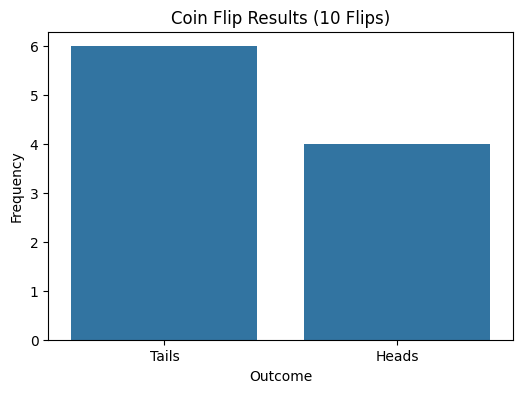

In [7]:
import random
coin_flips=[random.choice(['Heads','Tails']) for _ in range(10)]
# Count the occurrences of Heads and Tails
flip_counts = pd.Series(coin_flips).value_counts()

# Create a bar graph
plt.figure(figsize=(6, 4))
sns.barplot(x=flip_counts.index, y=flip_counts.values)
plt.title('Coin Flip Results (10 Flips)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

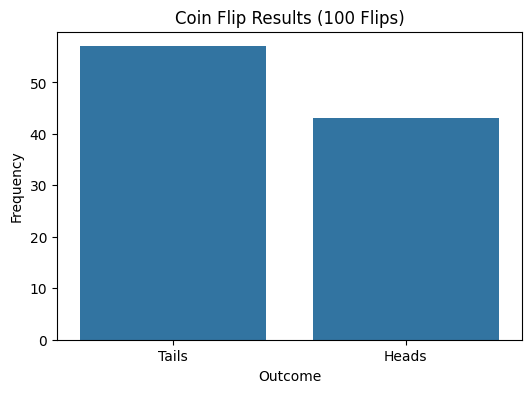

In [8]:
coin_flips=[random.choice(['Heads','Tails']) for _ in range(100)]
# Count the occurrences of Heads and Tails
flip_counts = pd.Series(coin_flips).value_counts()

# Create a bar graph
plt.figure(figsize=(6, 4))
sns.barplot(x=flip_counts.index, y=flip_counts.values)
plt.title('Coin Flip Results (100 Flips)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

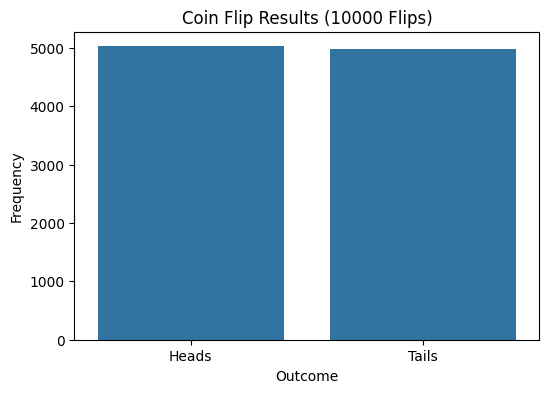

In [9]:
coin_flips=[random.choice(['Heads','Tails']) for _ in range(10000)]
# Count the occurrences of Heads and Tails
flip_counts = pd.Series(coin_flips).value_counts()

# Create a bar graph
plt.figure(figsize=(6, 4))
sns.barplot(x=flip_counts.index, y=flip_counts.values)
plt.title('Coin Flip Results (10000 Flips)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

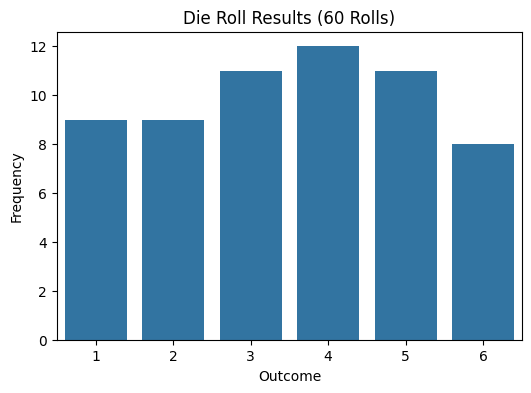

In [10]:
# roll a die 60 times and polt bargraph
die_rolls = [random.randint(1, 6) for _ in range(60)]
die_counts = pd.Series(die_rolls).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=die_counts.index, y=die_counts.values)
plt.title('Die Roll Results (60 Rolls)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

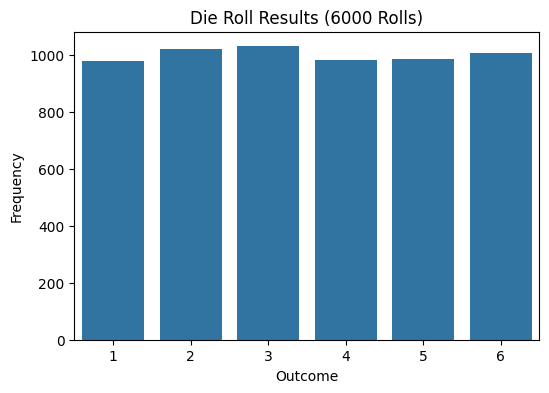

In [11]:
# 6000 times
die_rolls = [random.randint(1, 6) for _ in range(6000)]
die_counts = pd.Series(die_rolls).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=die_counts.index, y=die_counts.values)
plt.title('Die Roll Results (6000 Rolls)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

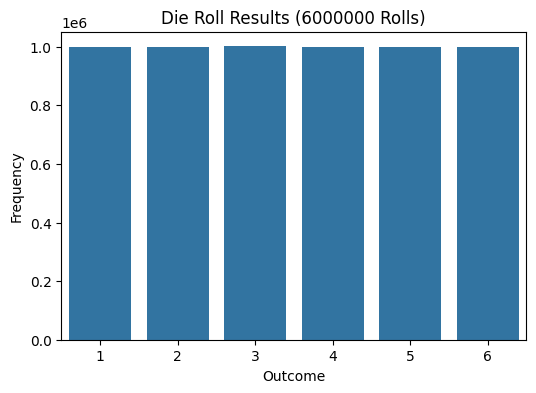

In [12]:
# 6000000 times
die_rolls = [random.randint(1, 6) for _ in range(6000000)]
die_counts = pd.Series(die_rolls).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=die_counts.index, y=die_counts.values)
plt.title('Die Roll Results (6000000 Rolls)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

## Normal Distribution

The normal distribution is a continuous probability distribution that is symmetric around its mean. It's characterized by two parameters: mean (μ) and standard deviation (σ).


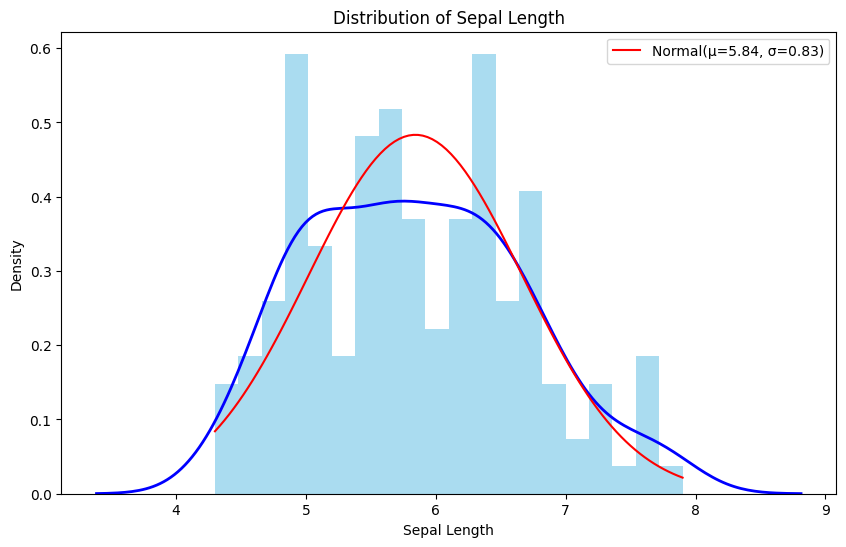

In [18]:
# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Extract sepal length (first feature)
sepal_length = X[:, 0]

# Plot histogram and normal distribution overlay
plt.figure(figsize=(10, 6))
plt.hist(sepal_length, bins=20, density=True, alpha=0.7, color='skyblue')
sns.kdeplot(sepal_length, color='blue', linewidth=2)
plt.xlabel('Sepal Length')
plt.ylabel('Density')
plt.title('Distribution of Sepal Length')

# Overlay normal distribution
mu, sigma = np.mean(sepal_length), np.std(sepal_length)
x = np.linspace(sepal_length.min(), sepal_length.max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label=f'Normal(μ={mu:.2f}, σ={sigma:.2f})')
plt.legend()
plt.show()

### Shapiro-wilk Test

We use the shapiro-wilks test to see if based on the emp

In [21]:
#shapiro wilks
res=stats.shapiro(sepal_length)
print("p-value = ",res[1])


p-value =  0.010181161454691156


### Exercise 1: Normal Distribution Analysis
**Task**: Using the diabetes dataset, analyze the distribution of the target variable (disease progression).

1. Load the diabetes dataset
2. Extract the target variable
3. Calculate mean and standard deviation
4. Create a histogram with normal distribution overlay
5. Perform a Shapiro-Wilk test to check if the data is normally distributed
6. Interpret the results

**Your Code Here:**

In [ ]:
# Load diabetes dataset
diabetes = load_diabetes()
# Your solution here

## Central Limit Theorem

### Theory
The Central Limit Theorem states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the population's distribution.

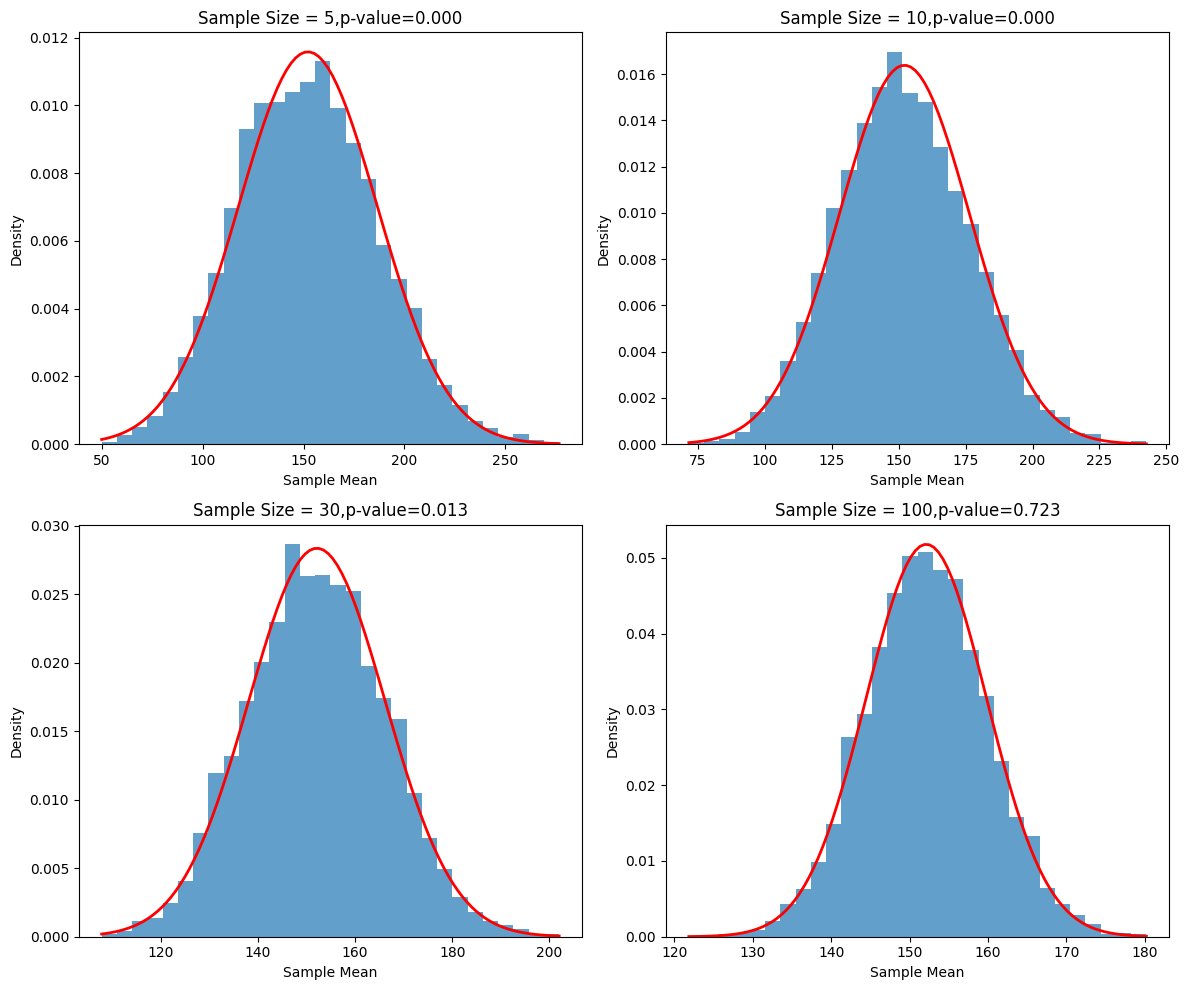

In [30]:
diabetes = load_diabetes()
population = diabetes.target

# Demonstrate CLT with different sample sizes
sample_sizes = [5, 10, 30, 100]
n_samples = 5000

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, n in enumerate(sample_sizes):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=n, replace=True)
        sample_means.append(np.mean(sample))

    res=stats.shapiro(sample_means)

    axes[i].hist(sample_means, bins=30, density=True, alpha=0.7)
    axes[i].set_title(f'Sample Size = {n},p-value={res[1]:.3f}')
    axes[i].set_xlabel('Sample Mean')
    axes[i].set_ylabel('Density')

    # Overlay theoretical normal distribution
    mu_theory = np.mean(population)
    sigma_theory = np.std(population) / np.sqrt(n)
    x = np.linspace(min(sample_means), max(sample_means), 100)
    axes[i].plot(x, stats.norm.pdf(x, mu_theory, sigma_theory), 'r-', linewidth=2)

plt.tight_layout()
plt.show()


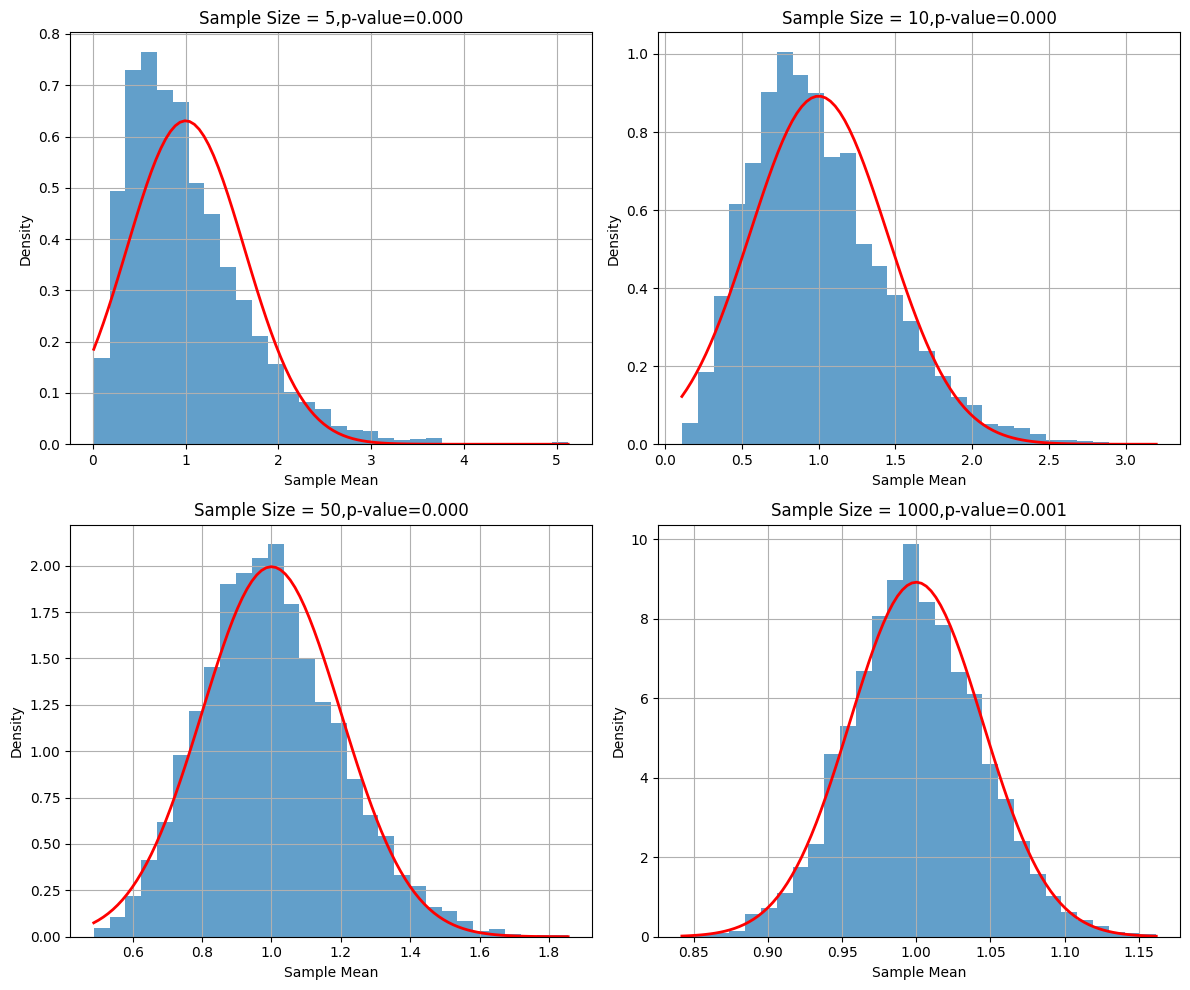

In [40]:
# CLt example sampled from chisq distribution

sample_sizes=[5,10,50,1000]
n_samples=5000
k=1

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, n in enumerate(sample_sizes):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.chisquare(df=k, size=n)
        sample_means.append(np.mean(sample))

    res=stats.shapiro(sample_means)

    axes[i].hist(sample_means, bins=30, density=True, alpha=0.7)
    axes[i].set_title(f'Sample Size = {n},p-value={res[1]:.3f}')
    axes[i].set_xlabel('Sample Mean')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

    # Overlay theoretical normal distribution
    mu_theory = k
    sigma_theory = np.sqrt(2 * k) / np.sqrt(n)

    x = np.linspace(min(sample_means), max(sample_means), 100)
    axes[i].plot(x, stats.norm.pdf(x, mu_theory, sigma_theory), 'r-', linewidth=2)

plt.tight_layout()
plt.show()



### Exercise 2: Central Limit Theorem Verification
**Task**: Using the iris dataset, demonstrate the Central Limit Theorem using petal width measurements.

1. Extract petal width data from the iris dataset
2. Create sampling distributions for sample sizes: 3, 10, 25, 50
3. Plot histograms showing how the sampling distribution becomes more normal
4. Calculate the theoretical and empirical means and standard deviations
5. Comment on how the sampling distribution changes with sample size

**Your Code Here:**

In [ ]:
# Load iris dataset
iris = load_iris()
# Your solution here

## Confidence Intervals

### Theory
A confidence interval provides a range of values that likely contains the true population parameter with a specified level of confidence.

In [31]:
# Load iris dataset
iris = load_iris()
sepal_length = iris.data[:, 0]

# Calculate 95% confidence interval for the mean
n = len(sepal_length)
mean = np.mean(sepal_length)
std_err = stats.sem(sepal_length)  # Standard error of the mean

# 95% confidence interval
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

margin_of_error = t_critical * std_err
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print(f"Sample mean: {mean:.3f}")
print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")
print(f"Margin of Error: {margin_of_error:.3f}")

Sample mean: 5.843
95% Confidence Interval: (5.710, 5.977)
Margin of Error: 0.134


### Confidence Interval for Proportion

In [32]:
# Create a binary variable: large sepal length (> median)
iris = load_iris()
sepal_length = iris.data[:, 0]
median_sepal = np.median(sepal_length)
large_sepal = sepal_length > median_sepal

# Calculate proportion and confidence interval using statsmodels
from statsmodels.stats.proportion import proportion_confint
import statsmodels.stats.proportion as smp

n = len(large_sepal)
x = np.sum(large_sepal)  # Number of successes
p_hat = x / n

print(f"Sample proportion (large sepal): {p_hat:.3f}")

# 95% confidence interval for proportion using Wilson method (more accurate)
ci_lower_prop, ci_upper_prop = proportion_confint(x, n, alpha=0.05, method='wilson')
print(f"95% Confidence Interval for Proportion: ({ci_lower_prop:.3f}, {ci_upper_prop:.3f})")

# Alternative: using normal approximation
ci_lower_normal, ci_upper_normal = proportion_confint(x, n, alpha=0.05, method='normal')
print(f"95% CI (Normal approximation): ({ci_lower_normal:.3f}, {ci_upper_normal:.3f})")

Sample proportion (large sepal): 0.467
95% Confidence Interval for Proportion: (0.389, 0.546)
95% CI (Normal approximation): (0.387, 0.547)


### Confidence Interval for Difference in Means


In [33]:
# Compare sepal length between two species
iris = load_iris()
X, y = iris.data, iris.target

setosa_sepal = X[y == 0, 0]
versicolor_sepal = X[y == 1, 0]

# Using scipy.stats for confidence interval of difference in means
# First, perform the t-test to get the confidence interval directly
t_stat, p_value = stats.ttest_ind(setosa_sepal, versicolor_sepal)

# Calculate confidence interval for difference using scipy
from scipy.stats import ttest_ind_from_stats

mean1, mean2 = np.mean(setosa_sepal), np.mean(versicolor_sepal)
std1, std2 = np.std(setosa_sepal, ddof=1), np.std(versicolor_sepal, ddof=1)
n1, n2 = len(setosa_sepal), len(versicolor_sepal)

# Using built-in function for confidence interval
result = stats.ttest_ind(setosa_sepal, versicolor_sepal)
ci_lower_diff, ci_upper_diff = result.confidence_interval(confidence_level=0.95)

print(f"Setosa mean: {mean1:.3f}, Versicolor mean: {mean2:.3f}")
print(f"Difference in means: {mean1 - mean2:.3f}")
print(f"95% CI for difference: ({ci_lower_diff:.3f}, {ci_upper_diff:.3f})")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.6f}")

Setosa mean: 5.006, Versicolor mean: 5.936
Difference in means: -0.930
95% CI for difference: (-1.105, -0.755)
t-statistic: -10.521, p-value: 0.000000


### Exercise 3: Confidence Interval Construction
**Task**: Using the diabetes dataset, construct different types of confidence intervals.

1. **Mean CI**: Calculate 90%, 95%, and 99% confidence intervals for the mean target variable
2. **Proportion CI**: Create a binary variable (e.g., high disease progression > 140) and calculate confidence intervals for the proportion using Wilson and normal methods
3. **Difference CI**: Split the data by a feature (e.g., gender) and calculate confidence intervals for the difference in means
4. **Variance CI**: Calculate a confidence interval for the population variance using chi-square distribution
5. Create visualizations showing how confidence intervals change with different confidence levels and sample sizes

**Your Code Here:**